In [8]:
using Jacobi
using PyPlot

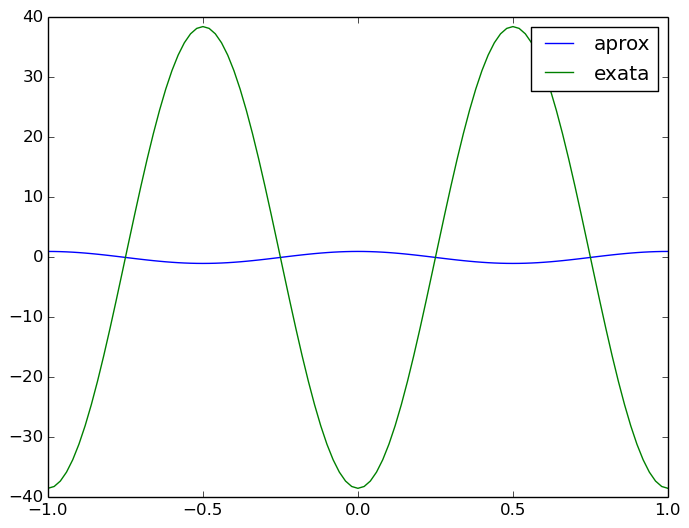

PyObject <matplotlib.legend.Legend object at 0x7f63ccb28cd0>

In [27]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [1/(b-a) -1/(b-a);-1/(b-a) 1/(b-a) ]




#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y'(-1) = 1,y'(1)=1
#dresp(x)= -2*pi*cos(2*pi*x)
fun(x) = (-4*pi^2 + 1)*cos
resp(x) = -sin(pi*x)^2+cos(pi*x)^2+sec(1)*sin(x)


resp_dir = 0*[resp(-1) resp(1)]




#test Neumann Dirichlet
#function test(Nel)

Nel = 100

a = -1.0
b = 1.0
Ndof = Nel + 1
xn = [linspace(a,b,Nel+1);];
idx = 2:Ndof-1
i_dirich = [1 Ndof]
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
  dof_map[1,i] = i
  dof_map[2,i] = i+1
end

#calcula dM
dl = zeros(Ndof-1)
dp = zeros(Ndof)

##
for e = 1:Nel
  dMe = stiff_matrix(xn[e], xn[e+1])
  Me = mass_matrix(xn[e], xn[e+1])
  for i = 1:2
      ig = dof_map[i,e]
      for k = 1:2
          kg = dof_map[k,e]
          if kg == ig #principal
              dp[kg] += -dMe[k,i] + Me[k,i]
          end
          if kg == ig + 1 && kg > 1#low
              dl[kg-1] += -dMe[k,i] + Me[k,i]
          end
      end
  end
end
dp[i_dirich] = 10^10 
Tri_dM = SymTridiagonal(dp,dl) 
#calcula phik 2xNdof
ϕ = zeros(2,Ndof) 
ϕ[1,1] = 1
ϕ[end,end] = 1
dresp_neuman = [dresp(1) dresp(-1)]
#calcula H = [phi_k(b)*u'(b) - phi_k(a)*u'(a)]
H = zeros(Ndof)
for i in 1:Ndof
    H[i] = ϕ[2,i]*dresp_neuman[2] - ϕ[1,i]*dresp_neuman[1]
end

#calcula F
fe = fun(xn);
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end

F = F - H
F[i_dirich] = 10^10 * resp_dir


#calcula V_k*[u'(b) - u'(a)]


#Solução
u = Tri_dM\F

#calcula erro
e1 = u - resp(xn)

return maxabs(e1)

plot(xn,u, label="aprox")
plot(xn,fun(xn),label = "exata")
legend()

In [29]:
ϕ

2x101 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [15]:
test(1000)

1.3501865663623214e-5